In [1]:
from pathlib import Path
import random 

from manipylator import HeadlessSimulatedRobot, SimulatedRobot
from manipylator.utils import render_robot_from_template

# Simulation
In this notebook we demonstrate that the `HeadlessSimulatedRobot` inherits the capabilities of the full Genesis environment available in `SimulatedRobot`. Furthermore, even when working headlessly we can use the similar semantics to manipulate the scene and visualize it. Using this class full GPU acceleration and requires a graphical environment.

In [2]:
with render_robot_from_template("robots/empiric") as robot_urdf:
    manny = SimulatedRobot(robot_urdf)
print(manny.model)

[I 08/21/25 22:26:23.578 46] [shell.py:_shell_pop_print@23] Graphical python shell detected, using wrapped sys.stdout


[Genesis] [22:26:30] [INFO] ╭───────────────────────────────────────────────╮
[Genesis] [22:26:30] [INFO] │┈┉┈┉┈┉┈┉┈┉┈┉┈┉┈┉┈┉┈ Genesis ┈┉┈┉┈┉┈┉┈┉┈┉┈┉┈┉┈┉┈│
[Genesis] [22:26:30] [INFO] ╰───────────────────────────────────────────────╯
[Genesis] [22:26:30] [WARNING] No Intel XPU device available. Falling back to CPU for torch device.


/opt/conda/lib/python3.11/site-packages/torch/cuda/__init__.py:129: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


[Genesis] [22:26:31] [INFO] Consider setting 'performance_mode=True' in production to maximise runtime speed, if significantly increasing compilation time is not a concern.


RHI Error: Can not create Vulkan instance
[W 08/21/25 22:26:31.903 46] [misc.py:adaptive_arch_select@758] Arch=[<Arch.vulkan: 10>] is not supported, falling back to CPU


[Genesis] [22:26:33] [INFO] Running on [Intel(R) Core(TM) i7-8665U CPU @ 1.90GHz] with backend gs.cpu. Device memory: 15.25 GB.
[Genesis] [22:26:33] [INFO] 🚀 Genesis initialized. 🔖 version: 0.2.1, 🌱 seed: None, 📏 precision: '32', 🐛 debug: False, 🎨 theme: 'dark'.
[Genesis] [22:26:33] [WARNING] Scene.show_FPS is deprecated. Please use Scene.profiling_options.show_FPS
[Genesis] [22:26:33] [INFO] Scene <468f605> created.
[Genesis] [22:26:33] [INFO] Adding <gs.RigidEntity>. idx: 0, uid: <b6c9ea5>, morph: <gs.morphs.Plane>, material: <gs.materials.Rigid>.
[Genesis] [22:26:33] [INFO] Preprocessing geom idx 0.
[Genesis] [22:26:37] [INFO] Adding <gs.RigidEntity>. idx: 1, uid: <10f4a81>, morph: <gs.morphs.URDF(file='/tmp/tmpctxfflti.urdf')>, material: <gs.materials.Rigid>.


[Genesis] [22:26:40] [INFO] Falling back to legacy URDF parser. Default values of physics properties may be off.
[Genesis] [22:26:40] [INFO] Applying offset to base link's pose with user provided value in morph.
[Genesis] [22:26:41] [INFO] Preprocessing geom idx 1.
[Genesis] [22:26:51] [INFO] Preprocessing geom idx 2.
[Genesis] [22:27:01] [INFO] Preprocessing geom idx 3.
[Genesis] [22:27:15] [INFO] Preprocessing geom idx 4.
[Genesis] [22:27:23] [INFO] Preprocessing geom idx 5.
[Genesis] [22:27:32] [INFO] Preprocessing geom idx 6.
[Genesis] [22:27:34] [INFO] Preprocessing geom idx 7.
[Genesis] [22:27:44] [INFO] Preprocessing geom idx 8.
[Genesis] [22:27:55] [INFO] Preprocessing geom idx 9.
[Genesis] [22:28:04] [INFO] Preprocessing geom idx 10.
[Genesis] [22:28:14] [INFO] Building scene <468f605>...
[Genesis] [22:28:39] [INFO] Compiling simulation kernels...
[Genesis] [22:29:48] [INFO] Building visualizer...
[Genesis] [22:30:26] [INFO] Viewer created. Resolution: 862×646, max_FPS: 60.
ER

For an arbitrary poes, we'll calculate the forward kinematics using both RTB and Genesis and compare:

In [5]:
arbitrary_pose = [random.uniform(-1, 1) for _ in range(6)]
print(arbitrary_pose)

[0.7257204736835576, -0.6800920600278824, -0.1803138897577512, 0.6184286914975157, 0.5499202496863653, -0.2680572846398279]


In [7]:
translation, rotation = manny.step_to_pose(arbitrary_pose)

print(f'translation: \n{translation.cpu().numpy()}\n')
print(f'rotation matrix: \n{rotation}')

translation: 
[0.15090322 0.35482532 0.70017743]

rotation matrix: 
[[ 0.93955483  0.17661188  0.29333424]
 [ 0.29963373 -0.00950913 -0.95400692]
 [-0.1656996   0.98423464 -0.06185322]]


Expect to see a Genesis GUI where the manipulator is simulated:
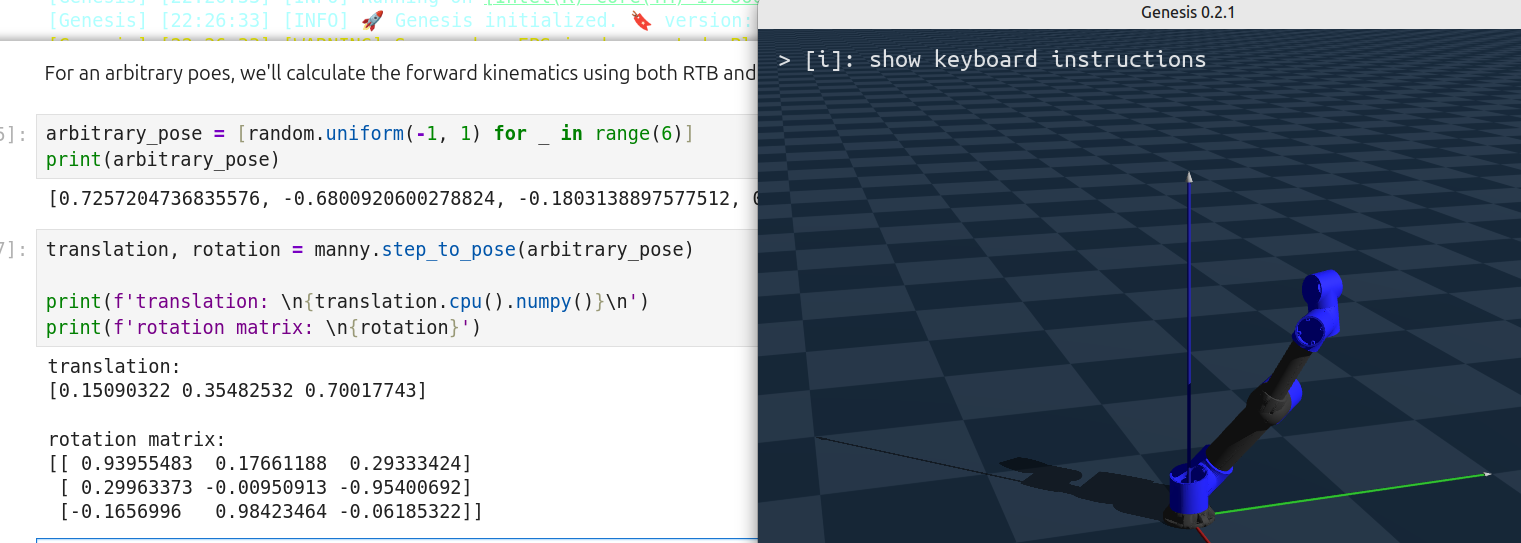

Try stepping to another pose and seeing the simulation update.

# Where To Now?
For those more interested in testing out an algorithm, maybe the [headless simulation notebook](http://localhost:8888/lab/tree/21-headless-simulation.ipynb) is more appropriate for you. If on ther otherhand, you're more interested in recording videos of your simulations, the [camera control notebook](http://localhost:8888/lab/tree/22-camera-controls.ipynb) should demonstrate how to use the Genesis camera.